# Chapter 6 - Multiple Regression I

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.api import het_breuschpagan, anova_lm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
import numpy as np

DATA_DIR = "../data"
yhat = '\u0177'
square = '\u00b2'

# 6.1 Multiple Regression Models (p 214)

This lengthy section is mostly abstract discussion of various multiple regressions and their forms.

##### Topics

Need for Several Predictor Variables

First-Order Model with Two Predicator Variables

First-Order Model with More than Two Predicator Variables

General Linear Regression Model

Qualitative Predictor Variables

Polynomial Regression

Transformed Variables

Interaction Effects

Combination of Cases

Meaning of Linear in General Linear Regression Model 

> It should be clear from the various examples that general linear regression model (6.7) is not restricted to linear response surfaces. The term *linear model* refers to the fact that model (6.7) is linear in the parameters; it does not refer to the shape of the response surface

Example of non-linear models (see chapter 13) includes forms like $y = x\exp^{\frac{1}{x}}$. While you may be able to transform this to a linear version, that is not always the case. Furthermore, doing so changes the structure of your errors and what you are modeling. This will be more apparent later (see chapter 12 as well).


# 6.2 General Linear Regression Model in Matrix Terms

This short section is a discussion and setup for the subsequent sections discussing the matrix algebra regarding least squares estimators.

# 6.3 Estimation of Regression Coefficients (p 223)

This short section covers the matrix algebra regarding least squares estimators.

# 6.4 Fitted Values and Residuals (p 224)

This short section covers a number of equations for the matrix algebra regarding fitted values and residuals.

# 6.5 Analysis of Variance Results (p 225)

##### Topics

Sums of Squares and Mean Squares

$F$ Test for Regression Relation

Coefficient of Multiple Determination

Coefficient of Multiple Correlation

# 6.6 Inferences about Regression (p 227)

#### Topics

Interval Estimation of $\beta_k$

Tests for $\beta_k$

Join Inferences

# 6.7 Estimation of Mean Response and Prediction of New Observation (p 229)

##### Topics

Interval Estimation of $E\{Y_h\}$

Confidence Region for Regression Surface

Simultaneous Confidence Intervals for Several Mean Responses

Prediction of New Observation $Y_{h(new)}$

Prediction of Mean of $m$ New Observations at $X_h$

Predictions of $g$ New Observations

Caution about Hidden Extrapolations

# 6.8 Diagnostics and Remedial Measures (p 232)

### Input the Dwaine Studios Data

In [2]:
df = pd.read_pickle(f"{DATA_DIR}/CH06FI05.xz")
df.columns = ['x1', 'x2', 'y']
model = ols("y ~ x1 + x2", data=df).fit()

### Figure 6.4 (p 232)

Scatter Plot Matrix and Correlation Matrix -- Dwaine Studios Example

###### Note

The color coding can be customized using various options. See [maplotplib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for more.

The pandas `scatter_matrix` produces extra information, like the variable histogram. See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) or [References](#References) for more.

,x1,x2,y
x1,1.000000,0.781299,0.944554
x2,0.781299,1.000000,0.835802
y,0.944554,0.835802,1.000000


array([[<AxesSubplot:xlabel='x1', ylabel='x1'>,
        <AxesSubplot:xlabel='x2', ylabel='x1'>,
        <AxesSubplot:xlabel='y', ylabel='x1'>],
       [<AxesSubplot:xlabel='x1', ylabel='x2'>,
        <AxesSubplot:xlabel='x2', ylabel='x2'>,
        <AxesSubplot:xlabel='y', ylabel='x2'>],
       [<AxesSubplot:xlabel='x1', ylabel='y'>,
        <AxesSubplot:xlabel='x2', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>]], dtype=object)

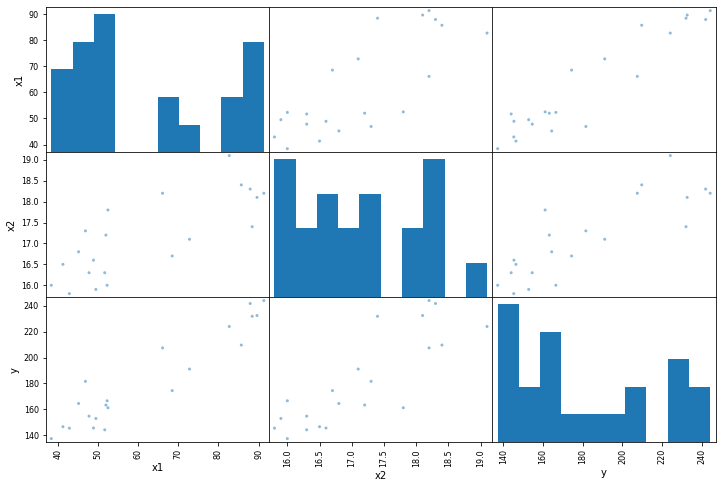

In [3]:
display(df.corr().style.background_gradient(cmap="coolwarm"))
display(pd.plotting.scatter_matrix(df, figsize=(12, 8)))

# 6.9 An Example -- Multiple Regression with Two Predictor Variables (p 236)

### Figure 6.5 (p 237)

Multiple Regression Output and Basic Data -- Dwaine Studios Example

In [4]:
pd.DataFrame({
    "TARGETPOP (X1)": df.x1,
    "DISPOINC (X2)": df.x2,
    "SALES (Y)": df.y,
    "FITTED": model.fittedvalues,
    "RESIDUAL": model.resid
}).round(2)

,TARGETPOP (X1),DISPOINC (X2),SALES (Y),FITTED,RESIDUAL
0,68.5,16.7,174.4,187.18,-12.78
1,45.2,16.8,164.4,154.23,10.17
2,91.3,18.2,244.2,234.40,9.80
3,47.8,16.3,154.6,153.33,1.27
4,46.9,17.3,181.6,161.38,20.22
5,66.1,18.2,207.5,197.74,9.76
6,49.5,15.9,152.8,152.06,0.74
7,52.0,17.2,163.2,167.87,-4.67
8,48.9,16.6,145.4,157.74,-12.34
9,38.4,16.0,137.2,136.85,0.35


In [5]:
display(model.summary())
display(anova_lm(model, typ=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     99.10
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.92e-10
Time:                        20:24:33   Log-Likelihood:                -78.549
No. Observations:                  21   AIC:                             163.1
Df Residuals:                      18   BIC:                             166.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.8571     60.017     -1.147      0.266    -194.948      57.234
x1             1.4546      0.212      6.868      0.000       1.010       1.899
x2             9.3655      4.064      2.305      0.033       0.827      17.904
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.722
Skew:                          -0.090   Prob(JB):                        0.697
Kurtosis:                       2.110   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,23371.806303,23371.806303,192.896156,4.639557e-11
x2,1.0,643.475809,643.475809,5.310844,3.332136e-02
Residual,18.0,2180.927411,121.162634,NaN,NaN


### Figure 6.6 (p 238) and Figure 6.7 (p 240)

Three-Dimensional Plots

###### Note

This example will not be included. The use of viewing a 3D version of what the scatter plot matrix provides is next to useless. Maybe in rare cases it can provide novel insights, but it only works in this one case. Most data will be more dimensions, in which case you would revert back to the scatter plot matrix. Therefore, avoid it. 

The interested reader can how it is done in [plotly](https://plotly.com/python/3d-scatter-plots/). There are also [3D planes](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) in matplotlib.

### Figure 6.8 (p 242)

Diagnostic Plots -- Dwaine Studios Example

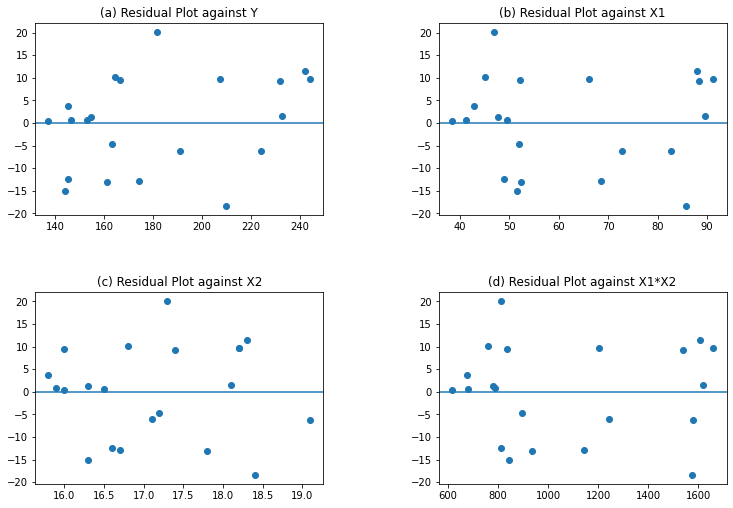

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
axes[0][0].set_title("(a) Residual Plot against Y")
axes[0][1].set_title("(b) Residual Plot against X1")
axes[1][0].set_title("(c) Residual Plot against X2")
axes[1][1].set_title("(d) Residual Plot against X1*X2")

axes[0][0].scatter(df.y, model.resid)
axes[0][0].axhline(y=0)

axes[0][1].scatter(df.x1, model.resid)
axes[0][1].axhline(y=0)

axes[1][0].scatter(df.x2, model.resid)
axes[1][0].axhline(y=0)

axes[1][1].scatter(df.x1*df.x2, model.resid)
axes[1][1].axhline(y=0)

plt.show()

### Figure 6.9 (p 243)

Additional Diagnostic Plots -- Dwaine Studios Example

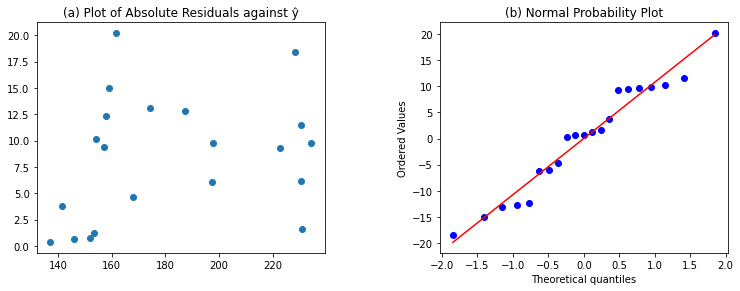

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

axes[0].scatter(model.fittedvalues, abs(model.resid))
stats.probplot(model.resid, plot=axes[1])

axes[0].set_title(f"(a) Plot of Absolute Residuals against {yhat}")
axes[1].set_title("(b) Normal Probability Plot")
plt.show()

### Estimation of Regression Parameters

Recall from chapter 4 that the 90 percent family confidence interval for $g=2$ parameters is equivalent to asking for the 95 percent confidence interval. In particular,

$B = t(1-\frac{\alpha}{2g}, n-2) = t(1-\frac{0.10}{4}, 18) = t(1-\frac{0.05}{2}, 18) = t(0.975, 18) = 2.101$

##### Note

The interested reader can try to manually compute these using `model.cov_params` (6.78)

In [8]:
model.conf_int()

,0,1
Intercept,-194.948013,57.233867
x1,1.009623,1.899497
x2,0.827441,17.903560


### Estimation of Mean Response (p 246)

In [9]:
xh = pd.DataFrame({"x1": [65.4], "x2": [17.6]})
model.get_prediction(xh).summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,191.10393,2.766798,185.291104,196.916757,167.2589,214.948961


### Prediction Limits of New Observations (p 247)

Scheffe and Bonferroni Procedures

##### Note

As in chapter 4, we compute B and S using the available model information and desired family confidence level. Since the Bonferroni multiplier is smaller, we use that method, which amounts to using the standard `get_prediction` method on these new observations at an alpha `alpha/g`. The observed confidence interval (not the mean) yields the desired results. 

In [10]:
xh = pd.DataFrame({"x1": [65.4, 53.1], "x2": [17.6, 17.7]})
alpha=0.10
g=len(xh)

B = stats.t.ppf(1-alpha/(2*g), model.nobs-2)
S = np.sqrt(g*stats.f.ppf(1-alpha, g, model.nobs-2))
display([B, S])

model.get_prediction(xh).summary_frame(alpha/g)

[2.093024054408263, 2.282810707956212]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,191.103930,2.766798,185.291104,196.916757,167.258900,214.948961
1,174.149397,4.598605,164.488087,183.810708,149.086727,199.212068


# References

[Linear Model Regression Results (statsmodels)](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html)

[Contrast Coding (statsmodels)](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

[QQ Plot or Normal Probability Plot (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

[Levene or Brown-Forsythe Test (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

[Z-Score Transformation (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

[Box Cox Transformations (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

### Graphics

[Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

[Matplotlib Color Maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)